# Machine Learning: Assignment 6
## Comparison of Multiple Classification Methods (max. 15p)

The file `data/voice.csv` contains measurement data about voices (field explanations in English).

Try to predict the label value of the field using other fields using different machine learning methods.

Split the data into training data and test data in a ratio of 80/20%.

* Also print how much different fields affect the variable predicted by the model (importances).
* Then choose the two most important explanatory variables and print a scatter diagram from them so that the male and female points are in different colors.

# Assignment 6.1
## Data preprocessing (2 points)

Familiarize yourself with the data and
implement data preprocessing.

In [3]:
# TODO: Preprocessing data
import pandas as pd 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load the data
data = pd.read_csv('./data/voice.csv')

# This will trasform the label (male/female) into a number
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])


   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  

# Assignment 6.2
## Training and test data (2 points)

Let's split the data into training and test sets and scale the numerical data.

In [7]:
# TODO: Splitting data

X = data.drop('label', axis=1)
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Assignment 6.3
## Building models (7 points)

Let's run different learning methods on the same data and save the results.
This assignment uses the following methods:

Use the following machine learning methods for classification:

1. Decision Tree (1 p)
2. Support Vector Machine   (1 p)
3. k Nearest Neighbors  (1 p)
4. Gaussian Naive Bayes (1 p)
5. Random Forest (1 p)
6. PCA and classification (2 p)

For all methods, calculate the accuracy and confusion matrix of the classification results.

Let's run different Machine learning methods on the same data and save the results.


### Decision Tree

In [20]:
# TODO: Decision Tree classification implementation

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)
dt_predictions = dt_classifier.predict(X_test_scaled)

# Printing the accuracy score of our decision tree classifier on the test set
dt_accuracy  = accuracy_score(y_test, dt_predictions)
dt_cm = confusion_matrix(y_test, dt_predictions)

print("Random Forest Classifier Accuracy: {:.2f}%".format(dt_accuracy * 100))
print("\nConfusion Matrix:\n", dt_cm)

Random Forest Classifier Accuracy: 96.69%

Confusion Matrix:
 [[292   5]
 [ 16 321]]


In [14]:
# TODO: Feature importances in Decision Tree classification
dt_feature_importances = pd.Series(dt_classifier.feature_importances_, index=X.columns)
print('Decision Tree Feature Importances:')
print(dt_feature_importances)

Decision Tree Feature Importances:
meanfreq    0.002053
sd          0.001560
median      0.000632
Q25         0.003267
Q75         0.002895
IQR         0.046840
skew        0.006330
kurt        0.005715
sp.ent      0.001273
sfm         0.020919
mode        0.004068
centroid    0.001524
meanfun     0.863249
minfun      0.024798
maxfun      0.000789
meandom     0.000000
mindom      0.001523
maxdom      0.005772
dfrange     0.005441
modindx     0.001353
dtype: float64


### Support Vector Machine

In [21]:
# TODO: SVC classification implementation
from sklearn.svm import SVC

svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train_scaled, y_train)
svm_predictions = svm_classifier.predict(X_test_scaled)

svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_cm = confusion_matrix(y_test, svm_predictions)

print("Random Forest Classifier Accuracy: {:.2f}%".format(svm_accuracy * 100))
print("\nConfusion Matrix:\n", svm_cm)

Random Forest Classifier Accuracy: 98.26%

Confusion Matrix:
 [[293   4]
 [  7 330]]


### kNN

In [22]:
# TODO: kNN classification implementation
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_scaled, y_train)
knn_predictions = knn_classifier.predict(X_test_scaled)

knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_cm = confusion_matrix(y_test, knn_predictions)

print("Random Forest Classifier Accuracy: {:.2f}%".format(knn_accuracy * 100))
print("\nConfusion Matrix:\n", knn_cm)

Random Forest Classifier Accuracy: 98.11%

Confusion Matrix:
 [[291   6]
 [  6 331]]


### Naive Bayes

In [23]:
# TODO: Naive Bayes classification implementation
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train_scaled, y_train)
nb_predictions = nb_classifier.predict(X_test_scaled)

nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_cm = confusion_matrix(y_test, nb_predictions)

print("Random Forest Classifier Accuracy: {:.2f}%".format(nb_accuracy * 100))
print("\nConfusion Matrix:\n", nb_cm)

Random Forest Classifier Accuracy: 90.85%

Confusion Matrix:
 [[270  27]
 [ 31 306]]


### Random Forest

In [19]:
# TODO: Random Forest classification implementation
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)
rf_predictions = rf_classifier.predict(X_test_scaled)

rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_cm = confusion_matrix(y_test, rf_predictions)
print("Random Forest Classifier Accuracy: {:.2f}%".format(rf_accuracy * 100))
print("\nConfusion Matrix:\n", rf_cm)

Random Forest Classifier Accuracy: 98.42%

Confusion Matrix:
 [[295   2]
 [  8 329]]


### PCA + classifier
PCA with *Random Forest Classifier* or any other classifier you want to use.

In [24]:
# TODO: PCA + selected Classifier
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

pca_rf_classifier = RandomForestClassifier(random_state=42)
pca_rf_classifier.fit(X_train_pca, y_train)
pca_rf_predictions = pca_rf_classifier.predict(X_test_pca)


pca_rf_accuracy = accuracy_score(y_test, pca_rf_predictions)
pca_rf_cm = confusion_matrix(y_test, pca_rf_predictions)
print("Random Forest Classifier Accuracy: {:.2f}%".format(pca_rf_accuracy * 100))
print("\nConfusion Matrix:\n", pca_rf_cm)

Random Forest Classifier Accuracy: 82.33%

Confusion Matrix:
 [[243  54]
 [ 58 279]]


### Visualization

Drawing patterns.
Draw patterns using the two most important explanatory variables

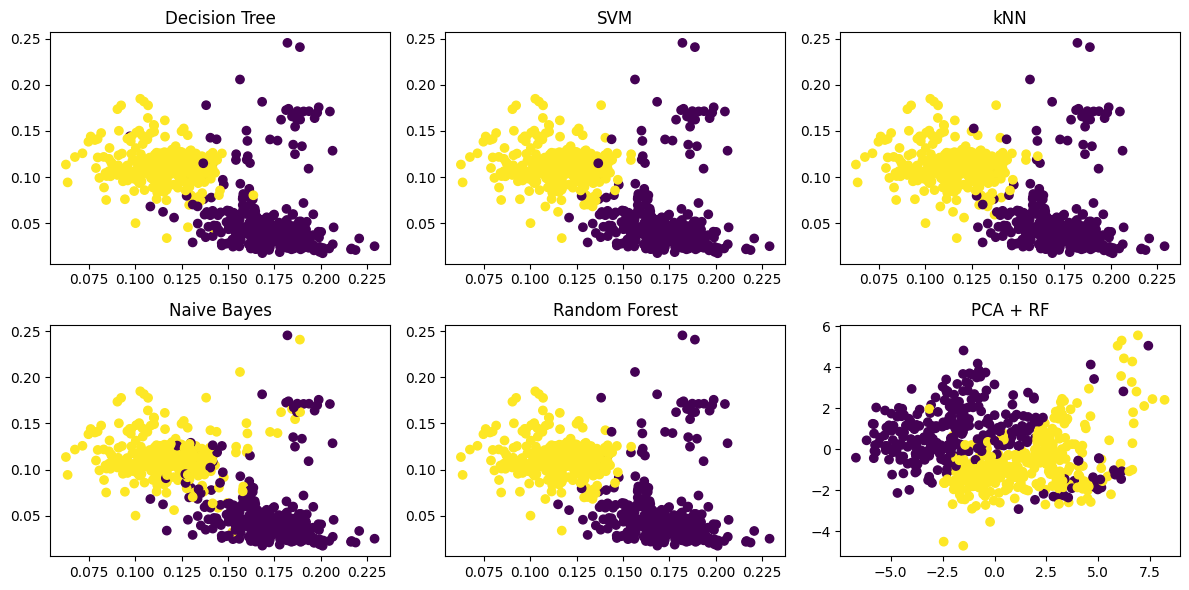

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

top_features = dt_feature_importances.nlargest(2).index

# Scatter plot for Decision Tree
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
plt.scatter(
    X_test[top_features[0]], X_test[top_features[1]], c=dt_predictions, cmap="viridis"
)
plt.title("Decision Tree")

# Scatter plot for SVM
plt.subplot(2, 3, 2)
plt.scatter(
    X_test[top_features[0]], X_test[top_features[1]], c=svm_predictions, cmap="viridis"
)
plt.title("SVM")

# Scatter plot for kNN
plt.subplot(2, 3, 3)
plt.scatter(
    X_test[top_features[0]], X_test[top_features[1]], c=knn_predictions, cmap="viridis"
)
plt.title("kNN")

# Scatter plot for Naive Bayes
plt.subplot(2, 3, 4)
plt.scatter(
    X_test[top_features[0]], X_test[top_features[1]], c=nb_predictions, cmap="viridis"
)
plt.title("Naive Bayes")

# Scatter plot for Random Forest
plt.subplot(2, 3, 5)
plt.scatter(
    X_test[top_features[0]], X_test[top_features[1]], c=rf_predictions, cmap="viridis"
)
plt.title("Random Forest")

# Scatter plot for PCA + RF
plt.subplot(2, 3, 6)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=pca_rf_predictions, cmap="viridis")
plt.title("PCA + RF")

plt.tight_layout()
plt.show()

# Assignment 6.4
## Analyzing and processing the results (4 p)

* Let's compare the results obtained from different classification methods
* Also try to retrieve the key features
* Draw some suitable figure using the two most important explanatory variables
* Also draw ROC curves (with AUC) when using different methods and compare how different machine learning methods progress.
* Q: How would you develop or improve learning outcomes?


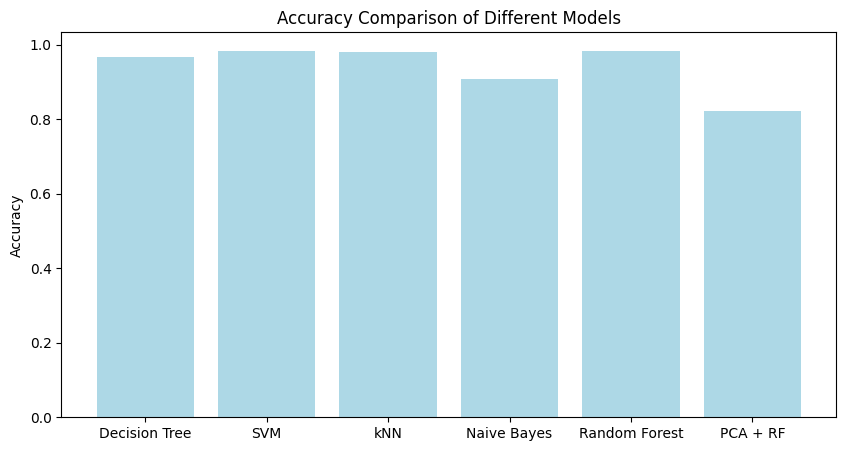


Key Features:
Decision Tree: Index(['meanfun', 'IQR'], dtype='object')
Random Forest: Index(['meanfun', 'IQR'], dtype='object')
PCA + RF: Index(['Principal Component 1', 'Principal Component 2'], dtype='object')


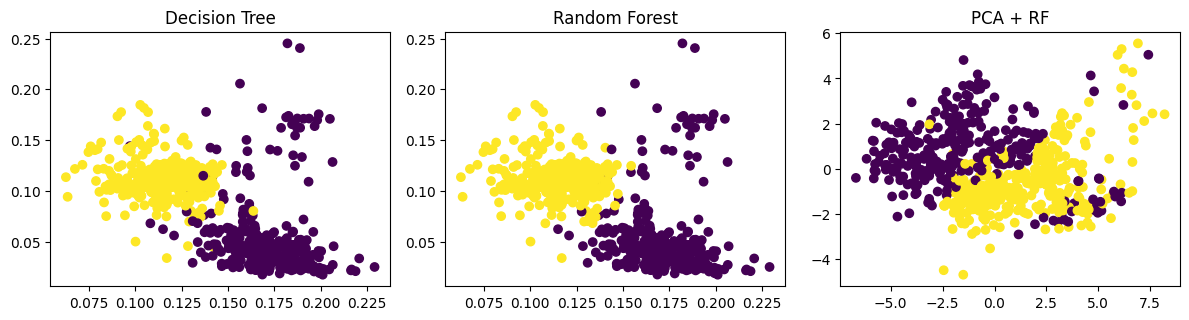

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

In [31]:
models = ["Decision Tree", "SVM", "kNN", "Naive Bayes", "Random Forest", "PCA + RF"]
accuracies = [
    dt_accuracy,
    svm_accuracy,
    knn_accuracy,
    nb_accuracy,
    rf_accuracy,
    pca_rf_accuracy,
]

plt.figure(figsize=(10, 5))
plt.bar(models, accuracies, color="lightblue")
plt.title("Accuracy Comparison of Different Models")
plt.ylabel("Accuracy")
plt.show()

# Retrieve Key Features
# For Decision Tree, Random Forest, and PCA + RF models
key_features_dt = dt_feature_importances.nlargest(2).index
key_features_rf = (
    pd.Series(rf_classifier.feature_importances_, index=X.columns).nlargest(2).index
)
key_features_pca_rf = (
    pd.Series(
        pca_rf_classifier.feature_importances_,
        index=["Principal Component 1", "Principal Component 2"],
    )
    .nlargest(2)
    .index
)

print("\nKey Features:")
print(f"Decision Tree: {key_features_dt}")
print(f"Random Forest: {key_features_rf}")
print(f"PCA + RF: {key_features_pca_rf}")

# Draw Figures using the Two Most Important Explanatory Variables
plt.figure(figsize=(12, 6))

# Scatter plot for Decision Tree
plt.subplot(2, 3, 1)
plt.scatter(
    X_test[key_features_dt[0]],
    X_test[key_features_dt[1]],
    c=dt_predictions,
    cmap="viridis",
)
plt.title("Decision Tree")

# Scatter plot for Random Forest
plt.subplot(2, 3, 2)
plt.scatter(
    X_test[key_features_rf[0]],
    X_test[key_features_rf[1]],
    c=rf_predictions,
    cmap="viridis",
)
plt.title("Random Forest")

# Scatter plot for PCA + RF
plt.subplot(2, 3, 3)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=pca_rf_predictions, cmap="viridis")
plt.title("PCA + RF")

plt.tight_layout()
plt.show()

# ROC Curves with AUC
plt.figure(figsize=(15, 8))

Text(0.5, 1.0, 'ROC Curve with SVM')

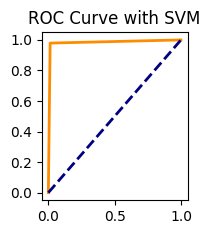

In [26]:
# TODO: ROC curve with SVM
from sklearn.metrics import roc_curve, auc

fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_predictions)
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.subplot(2, 3, 1)
plt.plot(
    fpr_svm, tpr_svm, color="darkorange", lw=2, label=f"SVM (AUC = {roc_auc_svm:.2f})"
)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.title("ROC Curve with SVM")

Text(0.5, 1.0, 'ROC Curve with kNN')

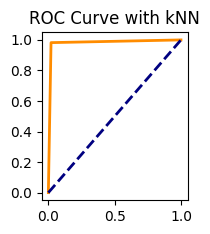

In [27]:
# TODO: ROC curve with kNN method
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_predictions)
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.subplot(2, 3, 2)
plt.plot(
    fpr_knn, tpr_knn, color="darkorange", lw=2, label=f"kNN (AUC = {roc_auc_knn:.2f})"
)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.title("ROC Curve with kNN")

Text(0.5, 1.0, 'ROC Curve with Decision Tree')

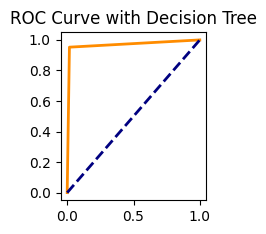

In [30]:
# TODO: ROC curve with decision tree method

fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_predictions)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.subplot(2, 3, 3)
plt.plot(
    fpr_dt,
    tpr_dt,
    color="darkorange",
    lw=2,
    label=f"Decision Tree (AUC = {roc_auc_dt:.2f})",
)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.title("ROC Curve with Decision Tree")

Text(0.5, 1.0, 'ROC Curve with Random Forest')

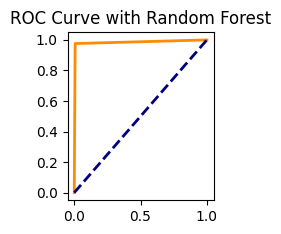

In [29]:
# TODO: ROC curve with random forest method

fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_predictions)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.subplot(2, 3, 4)
plt.plot(
    fpr_rf,
    tpr_rf,
    color="darkorange",
    lw=2,
    label=f"Random Forest (AUC = {roc_auc_rf:.2f})",
)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.title("ROC Curve with Random Forest")

Text(0.5, 1.0, 'ROC Curve with Naive Bayes')

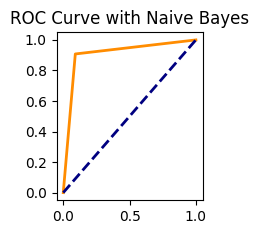

In [28]:
# TODO: ROC curve with Bayes method
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_predictions)
roc_auc_nb = auc(fpr_nb, tpr_nb)
plt.subplot(2, 3, 5)
plt.plot(
    fpr_nb,
    tpr_nb,
    color="darkorange",
    lw=2,
    label=f"Naive Bayes (AUC = {roc_auc_nb:.2f})",
)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.title("ROC Curve with Naive Bayes")

### Comparison of Different Classification Models

TODO: Analysis of classification results.

* Compare the classification results of different ML models.
* Are there other good classification methods to apply with this dataset?